In [1]:
import gzip
import pandas as pd
import os
import random
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, classification_report, r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
def load_initial_data(path):
    df = []
    for line in gzip.open(path, 'rb'):
        df.append(eval(line))
    return df

In [3]:
data = []
for file in os.listdir("amazon"):
    data+=load_initial_data("amazon/"+file)
    



In [4]:
data = data[:int(len(data)*0.2)]
random.shuffle(data)
dataframe = pd.DataFrame.from_dict(data)

In [5]:
dataframe.head()

,answer,answerTime,answerType,asin,question,questionType,unixTime
0,"do not clean to often, I clean the bowl after ...","Aug 11, 2014",NaN,B00B4H8WAI,The biggest PITA I have about My Electric Brin...,open-ended,1.407740e+09
1,"yes, comes with all except battery.","Sep 13, 2013",Y,B005C3F4L0,"Does this come with the controller, the motor ...",yes/no,1.379056e+09
2,Not sure about that one. I did it manually but...,"Jan 3, 2014",NaN,B0083XFGQO,Dose daylight savings time change automatically?,open-ended,1.388736e+09
3,Unfortunately I used them to dye baby things- ...,"Jun 13, 2014",NaN,B003PC9DPS,This says it is a 3 pack? Does that mean each ...,open-ended,1.402643e+09
4,great. work oerfect,"Oct 31, 2013",?,B0047Q7V5K,Does the freezer have a drain at the bottom to...,yes/no,1.383203e+09


In [6]:
X_train, Y_train = dataframe["question"], dataframe["questionType"]


In [7]:
index = np.random.rand(len(dataframe)) < 0.8
index

array([ True,  True, False, ...,  True,  True,  True])

In [8]:
TRAIN = dataframe[index]
TEST = dataframe[~index]

In [9]:
len(TRAIN)

223640

In [10]:
len(TEST)

55739

In [11]:
X_train, Y_train = TRAIN["question"], TRAIN["questionType"]
X_test, Y_test = TEST["question"], TEST["questionType"]

Y_train  = Y_train.apply(lambda y: 1 if y == "yes/no" else 0).as_matrix()
Y_test  = Y_test.apply(lambda y: 1 if y == "yes/no" else 0).as_matrix()

/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [12]:
mdl_lin = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1, 3))), ('lr', linear_model.LinearRegression())])
mdl_log = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1, 3))), ('lr', linear_model.LogisticRegression())])

In [13]:
mdl_lin.fit(X_train, Y_train)
mdl_log.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [14]:
pred_lin = mdl_lin.predict(X_test)
pred_log = mdl_log.predict(X_test)

In [15]:
print("LINEAR REGRESSION")
print("Accuracy: %.5f" % r2_score(Y_test, pred_lin))
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, pred_lin))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, pred_lin))
print()
print("LOGISTIC REGRESSION")
print("Accuracy: %.5f" % r2_score(Y_test, pred_log))
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, pred_log))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, pred_log))

LINEAR REGRESSION
Accuracy: 0.55596
Mean squared error: 0.11
Variance score: 0.56

LOGISTIC REGRESSION
Accuracy: 0.61794
Mean squared error: 0.10
Variance score: 0.62


In [16]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

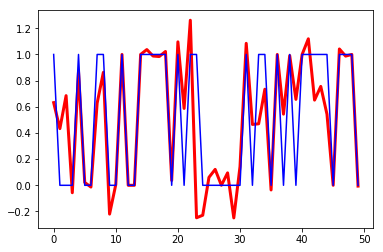

In [17]:
plt.plot(pred_lin[200:250], color='red', linewidth=3.0)
plt.plot(Y_test[200:250], color="blue")

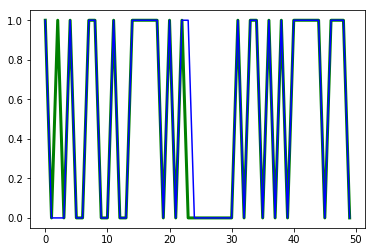

In [18]:
plt.plot(pred_log[200:250], color='green', linewidth=3.0)
plt.plot(Y_test[200:250], color="blue")

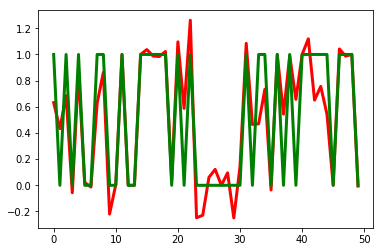

In [19]:
plt.plot(pred_lin[200:250], color='red', linewidth=3.0)
plt.plot(pred_log[200:250], color='green', linewidth=3.0)
